C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


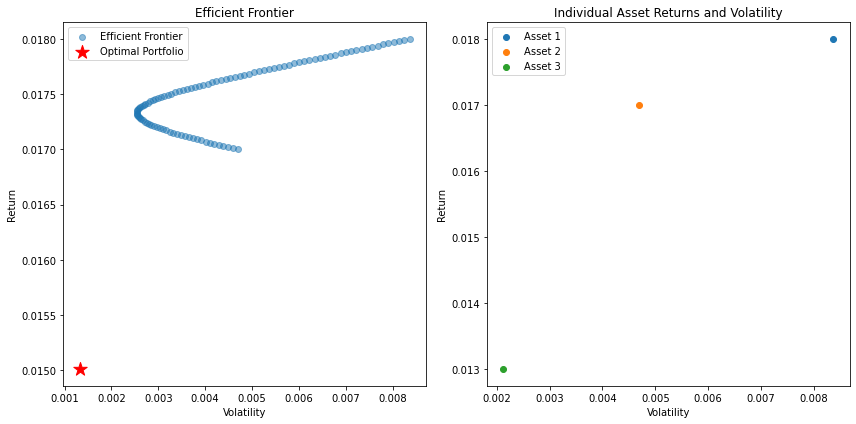

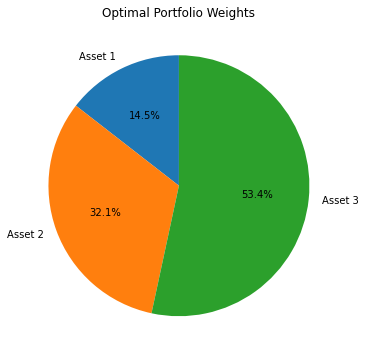

Optimal Portfolio Weights: [0.14485298 0.32144943 0.53369759]
Optimal Portfolio Return: 0.015010062621142822
Optimal Portfolio Volatility: 0.0013236549826573269


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Sample historical returns for three assets
returns_data = np.array([
    [0.02, 0.03, 0.01, 0.02, 0.01],
    [0.01, 0.015, 0.02, 0.018, 0.022],
    [0.015, 0.012, 0.01, 0.013, 0.015]
])

# Calculate expected returns and covariance matrix
expected_returns = np.mean(returns_data, axis=1)
covariance_matrix = np.cov(returns_data)

# PSO objective function for maximizing the Sharpe ratio
def objective_function(weights, returns, cov_matrix):
    portfolio_return = np.dot(returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = -portfolio_return / portfolio_volatility  # Minimize negative Sharpe ratio
    return sharpe_ratio

# Constraint: The sum of weights should be equal to 1
constraint = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}

# PSO optimization using scipy's minimize function
def optimize_portfolio(expected_returns, cov_matrix, constraint):
    num_assets = len(expected_returns)
    initial_weights = np.ones(num_assets) / num_assets  # Equal-weighted portfolio as initial guess

    result = minimize(
        objective_function,
        initial_weights,
        args=(expected_returns, cov_matrix),
        constraints=[constraint],
        bounds=[(0, 1) for _ in range(num_assets)],  # Boundaries for weights (0 to 1)
        method='SLSQP'  # Sequential Least Squares Quadratic Programming
    )

    return result.x

# Optimize the portfolio using PSO
optimal_weights = optimize_portfolio(expected_returns, covariance_matrix, constraint)

# Calculate optimal portfolio statistics
optimal_portfolio_return = np.dot(expected_returns, optimal_weights)
optimal_portfolio_volatility = np.sqrt(np.dot(optimal_weights.T, np.dot(covariance_matrix, optimal_weights)))

# Visualization: Efficient Frontier
weights_range = np.linspace(0, 1, 100)
efficient_frontier_returns = []
efficient_frontier_volatilities = []

for w in weights_range:
    weights = [w, 1 - w, 0]  # Assume a risk-free asset with zero return
    portfolio_return = np.dot(expected_returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(covariance_matrix, weights)))
    efficient_frontier_returns.append(portfolio_return)
    efficient_frontier_volatilities.append(portfolio_volatility)

# Scatter plot of the efficient frontier
plt.figure(figsize=(12, 6))

# Plotting the efficient frontier
plt.subplot(1, 2, 1)
plt.scatter(efficient_frontier_volatilities, efficient_frontier_returns, label='Efficient Frontier', alpha=0.5)
plt.scatter(optimal_portfolio_volatility, optimal_portfolio_return, color='red', marker='*', s=200, label='Optimal Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()

# Scatter plot of individual assets
plt.subplot(1, 2, 2)
for i in range(len(expected_returns)):
    plt.scatter(np.sqrt(covariance_matrix[i, i]), expected_returns[i], label=f'Asset {i + 1}')

plt.title('Individual Asset Returns and Volatility')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()

# Pie chart representing the weights of the optimal portfolio
plt.figure(figsize=(6, 6))
plt.pie(optimal_weights, labels=[f'Asset {i + 1}' for i in range(len(optimal_weights))], autopct='%1.1f%%', startangle=90)
plt.title('Optimal Portfolio Weights')
plt.show()

# Display results
print("Optimal Portfolio Weights:", optimal_weights)
print("Optimal Portfolio Return:", optimal_portfolio_return)
print("Optimal Portfolio Volatility:", optimal_portfolio_volatility)
